# Practical work on Hubble eXtrem Deep Field
The purpose of this tutorial is to apply basic image processing functions on the HXDF image.
Hubble eXtrem Deep Field, or HXDF, is a region located in the Fornax constellation ("Fourneau" in french), covering one thirteen-millionth of the sky, and which contains about 10,000 objects.

This shot is made from 2,000 images, is the result of 10 years of work.

[Futher informations](https://en.wikipedia.org/wiki/Hubble_Ultra-Deep_Field)

[HXDF in 3D](https://www.youtube.com/watch?v=oAVjF_7ensg)
## Setup

In [1]:
%matplotlib nbagg
from skimage import data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from skimage.morphology import convex_hull_image
from skimage import measure


## Open the image

<IPython.core.display.Javascript object>


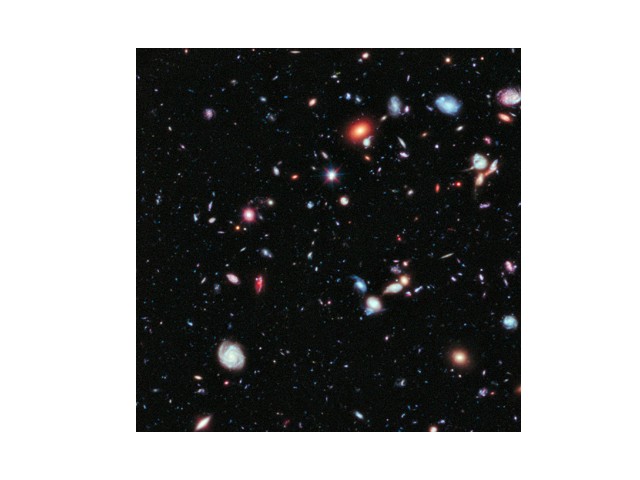

In [2]:
image = data.hubble_deep_field()[0:500, 0:500]
channels = ['red', 'green', 'blue']

fig = plt.figure("HDF")
plt.imshow(image)
plt.axis("OFF")
plt.show()

## Channel identification
The image has 5 informations per pixel, the x and y position and the pixel value in the 3 RGB channels :<br>
$pixel(x,y)=[R,G,B]$

<IPython.core.display.Javascript object>


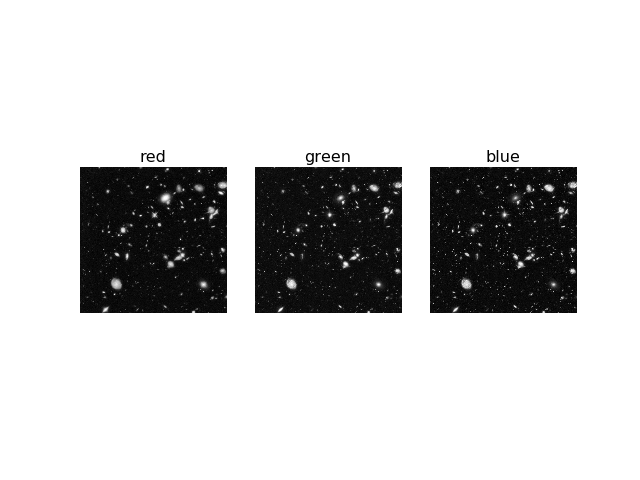

In [3]:
fig = plt.figure("Channels")
for i in range(0,3):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(image[:,:,i], origin = "upper", cmap = cm.gray)
    plt.title("{0}".format(channels[i]))
    plt.axis("OFF")
plt.show()

## Plot the histogram

<IPython.core.display.Javascript object>


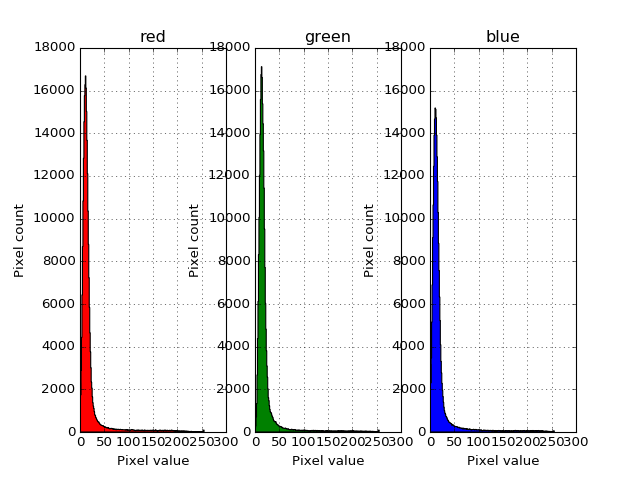

In [4]:
bins=np.arange(256)
fig = plt.figure("Histograms")
for i in range(0,3):
    fig.add_subplot(1, 3, i+1)
    plt.hist(image[:,:,i].flatten(), bins, histtype = "stepfilled", 
             color="{0}".format(channels[i]))
    plt.ylim([0,18000])

    plt.title("{0}".format(channels[i]))
    plt.grid()
    plt.xlabel("Pixel value")
    plt.ylabel("Pixel count")
plt.show()

## Thresholding the channels

<IPython.core.display.Javascript object>


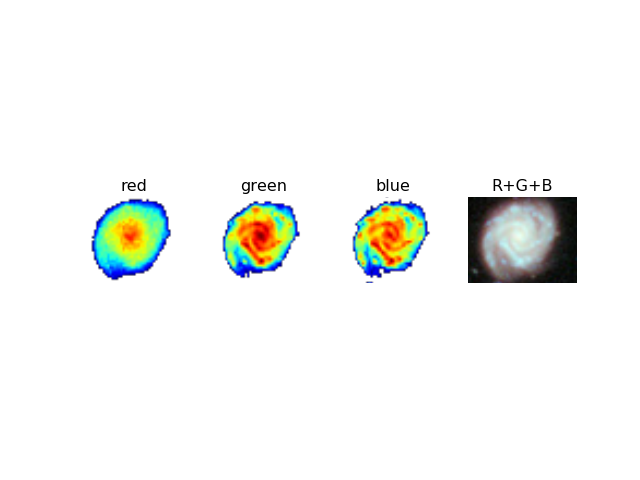

In [5]:
fig = plt.figure("Thresholding")

for i in range(0,3):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(np.where(image[:,:,i]<100,np.nan,image[:,:,i]), origin = "upper")
    plt.title("{0}".format(channels[i]))
    plt.ylim([380,420])
    plt.xlim([100,150])
    plt.axis("OFF")
    

fig.add_subplot(1, 4, 4)
plt.title("R+G+B")

plt.imshow(image[:,:,:], origin = "upper")
plt.ylim([380,420])
plt.xlim([100,150])
plt.axis("OFF")

plt.show()

<IPython.core.display.Javascript object>


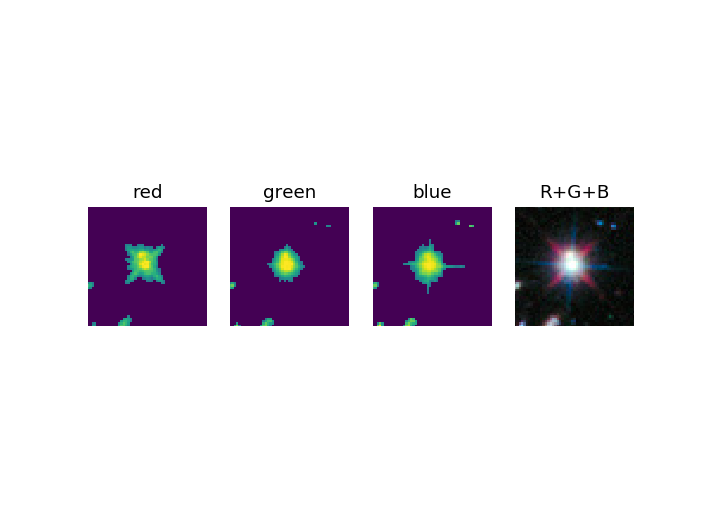

In [10]:
fig = plt.figure("Star")

for i in range(0,3):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(np.where(image[:,:,i]<100,0,image[:,:,i]), origin = "upper")
    plt.title("{0}".format(channels[i]))
    plt.ylim([140,190])
    plt.xlim([230,280])
    plt.axis("OFF")
    

fig.add_subplot(1, 4, 4)
plt.title("R+G+B")

plt.imshow(image[:,:,:], origin = "upper")
plt.ylim([140,190])
plt.xlim([230,280])
plt.axis("OFF")

plt.show()

<IPython.core.display.Javascript object>


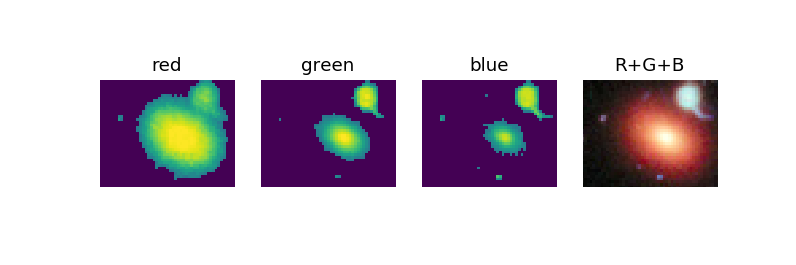

In [11]:
fig = plt.figure("Sun ?")

for i in range(0,3):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(np.where(image[:,:,i]<100,0,image[:,:,i]), origin = "upper")
    plt.title("{0}".format(channels[i]))
    plt.ylim([90,130])
    plt.xlim([260,310])
    plt.axis("OFF")
    

fig.add_subplot(1, 4, 4)
plt.title("R+G+B")

plt.imshow(image[:,:,:], origin = "upper")
plt.ylim([90,130])
plt.xlim([260,310])
plt.axis("OFF")

plt.show()

## 3D plot for fun

<IPython.core.display.Javascript object>


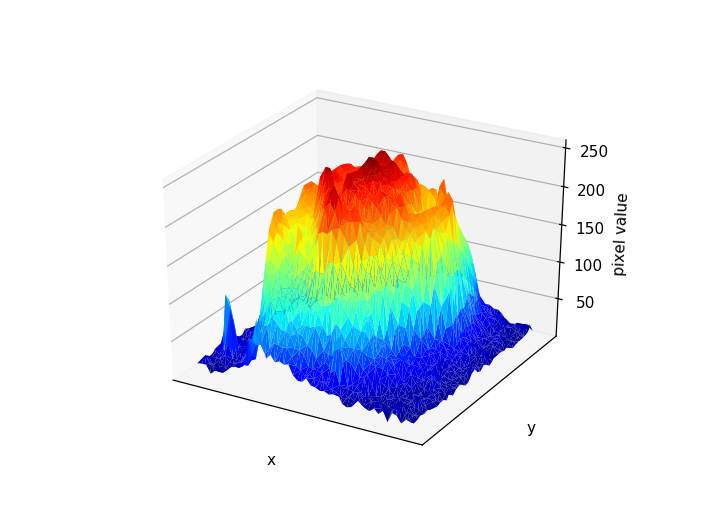

In [12]:
image3D = data.hubble_deep_field()[380:420,100:150][:,:,1]

fig = plt.figure("3D plot of a galaxy")
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(image3D.shape[1]),
                   np.arange(image3D.shape[0]))

ax.plot_trisurf(x.flatten(), y.flatten(), image3D.flatten(), cmap=plt.cm.jet,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('pixel value')
plt.show()

## Convex hull

<IPython.core.display.Javascript object>


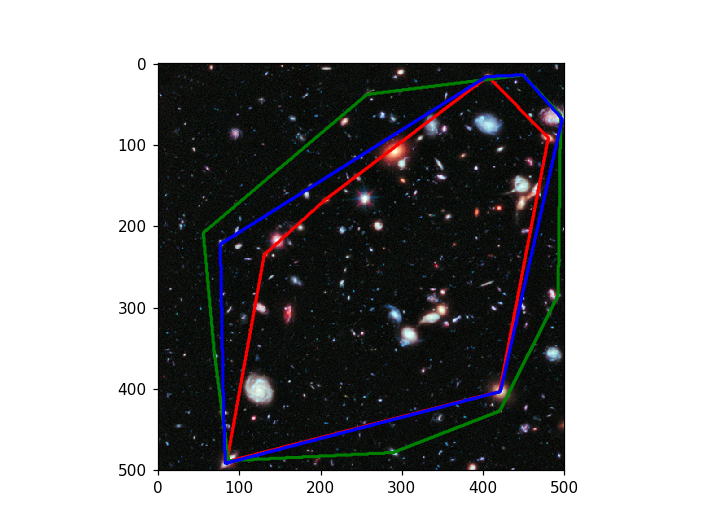

In [13]:
fig = plt.figure("Convex Hull")
plt.imshow(image, interpolation='nearest', cmap=plt.cm.gray)

r= convex_hull_image(np.where(image[:,:,0]==255,1,np.nan))
g= convex_hull_image(np.where(image[:,:,1]==255,1,np.nan))
b= convex_hull_image(np.where(image[:,:,2]==255,1,np.nan))

rc=measure.find_contours(r, 0.8)                        
gc=measure.find_contours(b, 0.8)
bc=measure.find_contours(g, 0.8)

for n, contour in enumerate(rc):
    plt.plot(contour[:, 1], contour[:, 0], c='r', linewidth=2)
for n, contour in enumerate(gc):
    plt.plot(contour[:, 1], contour[:, 0], c='g', linewidth=2)
for n, contour in enumerate(bc):
    plt.plot(contour[:, 1], contour[:, 0], c='b', linewidth=2)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()